In [20]:
import numpy as np
# 利用随机数制造数据集
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
X

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496],
       [ 1.11816122,  0.32508721,  0.31710572],
       [-1.02258878, -0.64384064, -0.13368695],
       [ 0.67351984, -0.27342519, -0.00787835],
       [ 1.01619558,  0.51546608,  0.46783297],
       [ 0.54957723,  0.67728016,  0.2340159 ],
       [-0.98960443,  0.00886617, -0.12152034],
       [ 1.13248106,  0.28229967,  0.06972972],
       [-0.99337712, -0.26832824, -0.15761101],
       [-0.94763679, -0.4995849 , -0.13927911],
       [ 1.10095709,  0.1706481 ,  0.09790432],
       [-0.34604591,  0.45334414,  0.06433843],
       [ 0.69102621, -0.27337761, -0.05926516],
       [ 0.68302902,  0.70421846,  0.24642318],
       [ 0.8774031 , -0.16775101, -0.02162333],
       [-1.06090127, -0.48213721, -0.38573526],
       [ 0.52336644,  0.66585845,  0.390

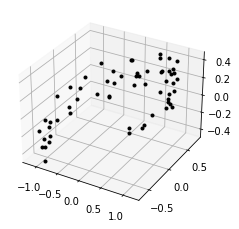

In [24]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0],X[:,1],X[:,2],"k.")
plt.show()

In [10]:
#svd分解
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [11]:
s #查看特征值，发现是按照大小顺序排列

array([6.77645005, 2.82403671, 0.78116597])

In [15]:
#利用特征值构造对角矩阵
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)


In [13]:
#检查SVD分解是否正确
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [19]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D #降维后的数据

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

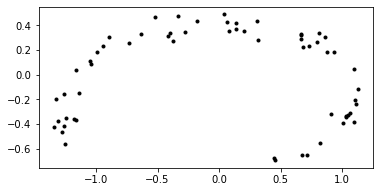

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
plt.show()